In [145]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [146]:
# input array
#X = np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
in_data_from_file = genfromtxt('cross_data.csv', delimiter=',', dtype=float)
X = in_data_from_file[...,:2]
Y = in_data_from_file[...,2:]

# output
#Y = np.array([[1],[1],[0]])

#print("X", X.shape)
#print("Y", Y.shape)

In [147]:
# sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# derivative of sigmoid function
def derivatives_sigmoid(x):
    return x*(1-x)

In [148]:
# variable initialization
inputlayer_neurons = X.shape[1] # number of feature in data set
hiddenlayer_neurons = 10 # number of hidden layer neurons
output_neurons = 1 # number of neurons at output layer

In [149]:
# weight and bias information
np.random.seed(9)
#wh = np.random.random(size=(inputlayer_neurons,hiddenlayer_neurons))
wh = np.zeros((inputlayer_neurons,hiddenlayer_neurons))
#wh = genfromtxt('w1.csv', delimiter=',', dtype=float).T
#bh = np.random.random(size=(1,hiddenlayer_neurons))
bh = np.zeros((1,hiddenlayer_neurons))
#bh = np.array([genfromtxt('b1.csv', delimiter=',', dtype=float)])
#wout = np.random.random(size=(hiddenlayer_neurons,output_neurons))
wout = np.zeros((hiddenlayer_neurons,output_neurons))
#wout = np.array([genfromtxt('w2.csv', delimiter=',', dtype=float)]).T
#bout = np.random.random(size=(1,output_neurons))
bout = np.zeros((1,output_neurons))
#bout = np.array([[genfromtxt('b2.csv', delimiter=',', dtype=float)]])

print ("wh", wh.shape)
print ("bh", bh.shape)
print ("wout", wout.shape)
print ("bout", bout.shape)

wh (2, 10)
bh (1, 10)
wout (10, 1)
bout (1, 1)


In [ ]:
lr = 0.7 # setting learning rate
mt = 0.3

i = 0
E_avg = 1
E_avg_per_epoch = np.array([])
epochs = np.array([])

while (E_avg > 0.001):
    
    E_sum = 0
    delta_wout_previous = np.zeros_like(wout)
    delta_bout_previous = np.zeros_like(bout)
    delta_wh_previous = np.zeros_like(wh)
    delta_bh_previous = np.zeros_like(bh)
    
    for x,y in zip(X,Y):
        #Forward Propogation
        x = np.array([x])
        hidden_layer_input1 = np.dot(x,wh)
        hidden_layer_input = hidden_layer_input1 + bh
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        output_layer_input1 = np.dot(hiddenlayer_activations,wout)
        output_layer_input = output_layer_input1 + bout
        output = sigmoid(output_layer_input)

        #Backpropogation
        e = y - output
        
        slope_output_layer = derivatives_sigmoid(output)
        slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        
        local_gradient_output = e * slope_output_layer
        delta_wout = (delta_wout_previous * mt) + (hiddenlayer_activations.T.dot(local_gradient_output) * lr)
        delta_bout = (delta_bout_previous * mt) + (np.sum(local_gradient_output, axis=0, keepdims=True) * lr)
        
        error_hidden_layer = local_gradient_output.dot(wout.T)
        local_gradient_hidden = error_hidden_layer * slope_hidden_layer
        
        delta_wh = (delta_wh_previous) + (x.T.dot(local_gradient_hidden) * lr)
        delta_bh = (delta_bh_previous) + (np.sum(local_gradient_hidden, axis=0, keepdims=True) * lr)
        
        wout += delta_wout
        bout += delta_bout

        wh += delta_wh 
        bh += delta_bh 
        
        delta_wout_previous = delta_wout
        delta_bout_previous = delta_bout
        delta_wh_previous = delta_wh
        delta_bh_previous = delta_bh
        
        E = (e**2)/2
        E_sum += E
    
    i += 1
    E_avg = E_sum/(len(X))
    #print(i, E_avg)
    E_avg_per_epoch = np.append(E_avg_per_epoch, E_avg)
    epochs = np.append(epochs, i)
    #if i == 5000:
    #    E_avg = 0.0001
    X, Y = shuffle(X, Y, random_state=0)
    if i == 1:
        print("******************************************")
        print(wh)
        wh.tofile("wh_01.csv",sep=',',format='%10.4f')
        print("******************************************")
        print(bh)
        bh.tofile("bh_01.csv",sep=',',format='%10.4f')
        print("******************************************")
        print(wout)
        wout.tofile("wout_01.csv",sep=',',format='%10.4f')
        print("******************************************")
        print(bout)
        bout.tofile("bout_01.csv",sep=',',format='%10.4f')

print("******************************************")
print(wh)
print("******************************************")
print(bh)
print("******************************************")
print(wout)
print("******************************************")
print(bout)

******************************************
[[-1.62616392 -1.62616392 -1.62616392 -1.62616392 -1.62616392 -1.62616392
  -1.62616392 -1.62616392 -1.62616392 -1.62616392]
 [ 8.46302941  8.46302941  8.46302941  8.46302941  8.46302941  8.46302941
   8.46302941  8.46302941  8.46302941  8.46302941]]
******************************************
[[-11.67511229 -11.67511229 -11.67511229 -11.67511229 -11.67511229
  -11.67511229 -11.67511229 -11.67511229 -11.67511229 -11.67511229]]
******************************************
[[ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]
 [ 0.32297682]]
******************************************
[[-1.10473992]]


In [ ]:
plt.plot(epochs, E_avg_per_epoch)
plt.xlabel("epochs")
plt.ylabel("Average error energy")
plt.title("lr = " + str(lr) + ", mt = " + str(mt) + ", epochs = " + str(i) + ", E_avg = " + str(E_avg_per_epoch[(i-1)]))
plt.show()
print(E_avg_per_epoch.min())

17


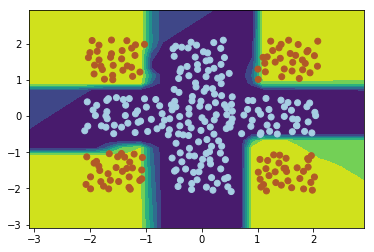

In [109]:
print(i)
x = X[:,0:1]
y = X[:,1:2]
x = np.reshape(x, 314,)
y = np.reshape(y, 314,)

x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

# here "model" is your model's prediction (classification) function
plotData = np.c_[xx.ravel(), yy.ravel()]
def predict(x):
    hidden_layer_input1 = np.dot(x,wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1 = np.dot(hiddenlayer_activations,wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)
    return output
        
Z = predict(plotData)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
#plt.axis('off')


plt.scatter(x,y,c=Y,cmap=plt.cm.Paired)
plt.show()